In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import control as ct

In [21]:
g = 9.81
data = np.genfromtxt("measurements/119Hz_2g.csv", delimiter=',')
# data = [np.genfromtxt(entry.path, delimiter=',') 
#             for entry in os.scandir("measurements") 
#             if entry.is_file() and entry.path.endswith(".csv")]

In [4]:
data.shape

(3500249, 3)

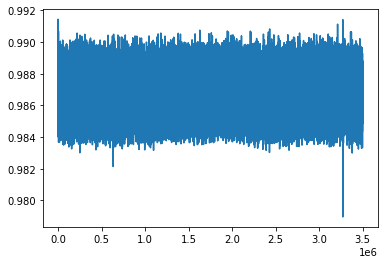

In [5]:
a = np.sqrt(np.sum(data**2, axis=-1))
plt.plot(a)

In [22]:
g*data

array([[ 0.07843693, -0.13052852,  9.69563786],
       [ 0.07424561, -0.1442999 ,  9.67707646],
       [ 0.06227054, -0.15507756,  9.67827397],
       ...,
       [ 0.05269039, -0.21016297,  9.66689761],
       [ 0.04909787, -0.21255798,  9.68007018],
       [ 0.06047424, -0.20896546,  9.67947148]])

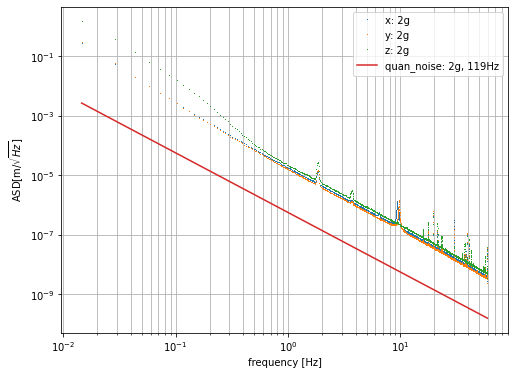

In [23]:


fs = 119
quan_noise = (4/2**16)*g/np.sqrt(6*fs)

f, Pxx_den = signal.welch(data[100000:]*g, fs, nperseg=8192, axis=0)
Axx_den = np.sqrt(Pxx_den)
omega = 2*np.pi*f[1:]
mag, phase, *_ = ct.tf(1, [1, 0, 0]).frequency_response(omega)

plt.figure(figsize=(8,6))
labels = ['x','y','z']
for i, label in enumerate(labels):
    plt.loglog(f[1:], Axx_den[1:, i]*mag, ',',label=label+ ": 2g")
plt.loglog(f[1:], quan_noise*mag, label='quan_noise: 2g, 119Hz')
plt.ylabel(r'ASD[m/$\sqrt{Hz}]$')
plt.xlabel('frequency [Hz]')
plt.legend()
plt.grid(which='both')
plt.show()

In [24]:
?signal.welch

Signature:
signal.welch(
    x,
    fs=1.0,
    window='hann',
    nperseg=None,
    noverlap=None,
    nfft=None,
    detrend='constant',
    return_onesided=True,
    scaling='density',
    axis=-1,
    average='mean',
)
Docstring:
Estimate power spectral density using Welch's method.

Welch's method [1]_ computes an estimate of the power spectral
density by dividing the data into overlapping segments, computing a
modified periodogram for each segment and averaging the
periodograms.

Parameters
----------
x : array_like
    Time series of measurement values
fs : float, optional
    Sampling frequency of the `x` time series. Defaults to 1.0.
window : str or tuple or array_like, optional
    Desired window to use. If `window` is a string or tuple, it is
    passed to `get_window` to generate the window values, which are
    DFT-even by default. See `get_window` for a list of windows and
    required parameters. If `window` is array_like it will be used
    directly as the window and it

In [ ]:
f_xy, cohXY = signal.coherence(averaged[:,0], averaged[:,1], fs=fs, nperseg=256)

plt.semilogx(f_xy, cohXY, label='coherence: XY')
plt.legend()